In [3]:
## Importing necassary libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import random as rand
import cv2
import matplotlib.image as img

In [4]:
## Parameter to change outputted password length

password_length = 20

In [5]:
# Reading raw lava lamp captures

pic_1 = img.imread("pic1/t1.png")
pic_2 = img.imread("pic1/t2.png")
pic_3 = img.imread("pic1/t3.png")
pic_4 = img.imread("pic1/t4.png")

In [6]:
## Encoding movements of lava lamps

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

# Converting to images gray scale
g1 = rgb2gray(pic_1)
g2 = rgb2gray(pic_2)
g3 = rgb2gray(pic_3)
g4 = rgb2gray(pic_4)
# plt.imshow(g2, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)

# Determining movements over time period
diff1 = cv2.absdiff(g2, g3)
diff2 = cv2.absdiff(g1, g4)
# plt.imshow(diff1, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)

# Combining movements into 3D tensor(3rd dimension is time)
diff_max = np.dstack((diff1, diff2))

In [7]:
# Approximating data matrices with low-rank ones, while still preserving variance. 
# Used heavily in data mining to find features in higher order matrixes.
# For our purposes, we transform the movement of lava lamps in 3D(x,y,time) into a single matrix for feature extraction.

u, s, vh = np.linalg.svd(diff_max)

<Axes: >

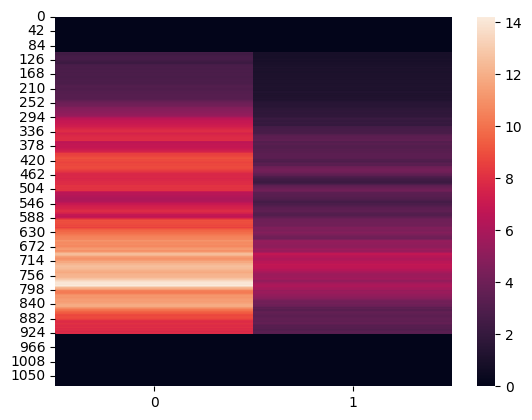

In [8]:
# Visualization of the latent matrix, not needed.

sb.heatmap(s)

In [9]:
# Reservoir Sampling Algorithim
# Mathmatically proven to sample M points in an equal distribution from a given list/stream.

def reservoir_sampling(stream, M):
    sampled = [-1]*M
    for i in range(len(stream)):
        if(i < M): #Space avaliable
            sampled[i] = stream[i]
        else:
            draw = rand.randint(0,i)
            if(draw < M):
                sampled[draw] = stream[i]
    return sampled
        

In [10]:
# String with all valid password characters, to get password.

allChars = "qwertyuiopasdfghjklzxcvbnmQWERTYUIOPASDFGHJKLZXCVBNM1234567890!@#$%^&*()=+\<>/?"
shuffledAllChars = "dE=Ahe\jFfN2DB+x#$5qSyVmg/pUoP@sHQW(anCG&rzw^)J?k%KliZ<YcbvtX>9T!uRL6I014M8O37*"

In [11]:
# Sampling values from low-rank matrix, and turning them into index values.

prestreamed = []
for i in range(int(s.size/2)):
    if(s[i][0] > 0):
        prestreamed.append(int(s[i][0] * 1000) % len(shuffledAllChars))
    if(s[i][1] > 0):
        prestreamed.append(int(s[i][1] * 1000) % len(shuffledAllChars))
    
indexes = reservoir_sampling(prestreamed, password_length)
print(indexes)

[10, 23, 31, 13, 23, 34, 20, 49, 30, 29, 17, 35, 8, 68, 15, 13, 18, 8, 39, 28]


In [16]:
# Index values will be used to select characters from 'shuffledAllChars' variable
# and putting them into a password variable, which will then be outputted.  

password = ""
for i in range(len(indexes)):
    password += (shuffledAllChars[indexes[i]])

In [19]:
print("True Random Password:", password)

True Random Password: NmsBmWS%@P$(F6xB5FGo
